<ipython-input-20-9cddd6c8eeb6>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  M = np.array(M)


Accuracy: 0.9666666666666667


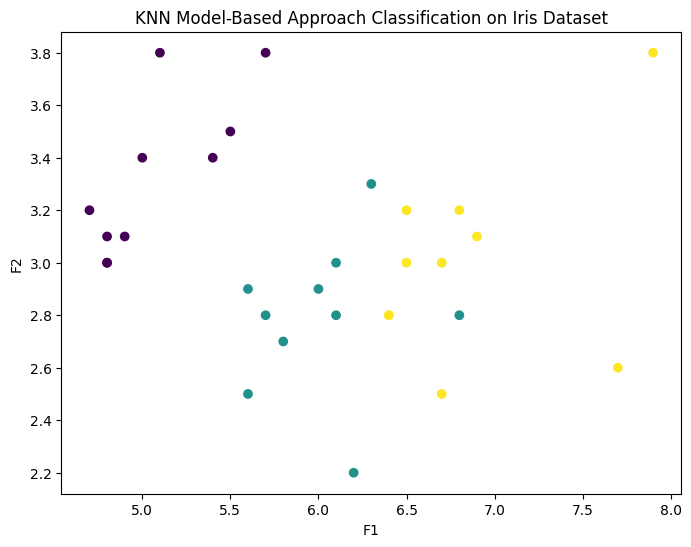

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean

iris = load_iris()

#Define KNN model-based approach for classification
def knn_model_based_approach(X_train, y_train, X_test):
    #Step1: Here we will calculate the similarity matrix 
    similarity_mat = np.zeros((X_train.shape[0],X_train.shape[0]))
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[0]):
            similarity_mat[i,j] = 1/(1+euclidean(X_train[i],X_train[j]))
    
    # Step2: Here we will initialize the tags
    tags = np.zeros(X_train.shape[0])
    
    # Step3-5: Now constructing the model M
    M = []
    while np.sum(tags) < X_train.shape[0]:
        ungrp_idx = np.where(tags == 0)[0] #ungrouped index
        largest_local_neighbourhood = np.zeros(ungrp_idx.shape[0])
        for i, idx in enumerate(ungrp_idx):
            neighbours = np.where(similarity_mat[idx,:] >= 0.5)[0]
            categories = y_train[neighbours]
            largest_local_neighbourhood[i] = np.sum(categories == np.bincount(categories).argmax())
        largest_global_neighbourhood_idx = ungrp_idx[np.argmax(largest_local_neighbourhood)]
        neighbours = np.where(similarity_mat[largest_global_neighbourhood_idx,:] >= 0.5)[0]
        categories = y_train[neighbours]
        representative = (np.bincount(categories).argmax(), np.min(similarity_mat[largest_global_neighbourhood_idx,neighbours]), neighbours.shape[0], X_train[largest_global_neighbourhood_idx])
        M.append(representative)
        tags[neighbours] = 1
    
    # Step6: Returning M
    M = np.array(M)
    
    #...................CLASSIFICATION...................#

    # Step1: Calculating the similarity matrix between X_test & M 
    similarity_mat = np.zeros((X_test.shape[0], M.shape[0]))
    for i in range(X_test.shape[0]):
        for j in range(M.shape[0]):
            similarity_mat[i,j] = 1 / (1 + euclidean(X_test[i], M[j,3]))
    
    # Step2-4: Classification
    y_pred = []
    for i in range(X_test.shape[0]):
        covering_reps_idx = np.where(similarity_mat[i,:] >= M[:,1])[0]
        if covering_reps_idx.shape[0] == 1:
            y_pred.append(M[covering_reps_idx[0],0])
        else:
            if(covering_reps_idx.shape[0] == 0):
            
                y_pred.append(-1)
            else:
        
                covering_reps_num = M[covering_reps_idx,2]
                max_covering_reps_idx = np.argmax(covering_reps_num)
                y_pred.append(M[covering_reps_idx[max_covering_reps_idx],0])

            if (y_pred[i]==-1):
              closest_boundary_rep_idx = np.argmin(similarity_mat[i,:])
              y_pred[i] = M[closest_boundary_rep_idx,0]
    return np.array(y_pred)


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
# Test KNN model-based approach for classification on Iris dataset
y_pred = knn_model_based_approach(X_train, y_train, X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt

#Classify test set using knn_model_based_approach
y_pred = knn_model_based_approach(X_train, y_train, X_test)

#Plot classified data
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='viridis')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('KNN Model-Based Approach Classification on Iris Dataset')
plt.show()
